# Capstone Notebook
### Course: Applied Data Science Capstone by IBM/Coursera

### Data Preparation

In [178]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# READ IN DATA
df = pd.read_csv('Data-Collisions.csv')
df.dtypes

/Users/calelewis/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

,SEVERITYCODE,INCDATE,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,2,2013/03/27 00:00:00+00,Intersection,Angles,Wet,Daylight,NaN,NaN,N,N
1,1,2006/12/20 00:00:00+00,Block,Sideswipe,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,2004/11/18 00:00:00+00,Block,Parked Car,Dry,Daylight,NaN,NaN,0,N
3,1,2013/03/29 00:00:00+00,Block,Other,Dry,Daylight,NaN,NaN,N,N
4,2,2004/01/28 00:00:00+00,Intersection,Angles,Wet,Daylight,NaN,NaN,0,N


In [294]:
# CREATE SHORTLIST OF DESIRED FACTORS
short_df = df[['SEVERITYCODE','INCDATE', 'ADDRTYPE','COLLISIONTYPE','ROADCOND','LIGHTCOND','SPEEDING', 'INATTENTIONIND', 'UNDERINFL','HITPARKEDCAR']]
short_df.head()

# change 'INCDATE' to datetime
short_df['INCDATE'] =  pd.to_datetime(short_df['INCDATE'], format='%Y/%m/%d')
# extract features
short_df['YEAR'] = pd.DatetimeIndex(short_df['INCDATE']).year
short_df['MONTH'] = pd.DatetimeIndex(short_df['INCDATE']).month
short_df['DAY_OF_WEEK'] = pd.DatetimeIndex(short_df['INCDATE']).dayofweek

short_df.drop('INCDATE', axis=1, inplace=True)

# fix 'UNDERINFL' column of mixed types
short_df['UNDERINFL'].replace(('Y', 'N'), (1, 0), inplace=True)
short_df['UNDERINFL'].replace(('1', '0'), (1, 0), inplace=True)

short_df['SPEEDING'].replace(np.nan, 'N', inplace=True)
short_df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)
short_df['UNDERINFL'].replace(np.nan, 0.0, inplace=True)

short_df.dtypes

/Users/calelewis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/calelewis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/calelewis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

SEVERITYCODE        int64
ADDRTYPE           object
COLLISIONTYPE      object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
INATTENTIONIND     object
UNDERINFL         float64
HITPARKEDCAR       object
YEAR                int64
MONTH               int64
DAY_OF_WEEK         int64
dtype: object

In [55]:
short_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR,YEAR,MONTH,DAY_OF_WEEK
0,2,Intersection,Angles,Wet,Daylight,NaN,NaN,N,N,2013,3,2
1,1,Block,Sideswipe,Wet,Dark - Street Lights On,NaN,NaN,0,N,2006,12,2
2,1,Block,Parked Car,Dry,Daylight,NaN,NaN,0,N,2004,11,3
3,1,Block,Other,Dry,Daylight,NaN,NaN,N,N,2013,3,4
4,2,Intersection,Angles,Wet,Daylight,NaN,NaN,0,N,2004,1,2


### Check entries for uniformity

In [67]:
short_df['SEVERITYCODE'].value_counts(dropna=False)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [66]:
short_df['ADDRTYPE'].value_counts(dropna=False)

Block           126926
Intersection     65070
NaN               1926
Alley              751
Name: ADDRTYPE, dtype: int64

In [65]:
short_df['COLLISIONTYPE'].value_counts(dropna=False)

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
NaN            4904
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [64]:
short_df['ROADCOND'].value_counts(dropna=False)

Dry               124510
Wet                47474
Unknown            15078
NaN                 5012
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [283]:
short_df['LIGHTCOND'].value_counts(dropna=False)

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
NaN                           5170
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [164]:
short_df['SPEEDING'].value_counts(dropna=False)

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [287]:
short_df['INATTENTIONIND'].value_counts(dropna=False)

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [79]:
short_df['UNDERINFL'].value_counts(dropna=False)

0.0    180668
1.0      9121
NaN      4884
Name: UNDERINFL, dtype: int64

In [80]:
short_df['HITPARKEDCAR'].value_counts(dropna=False)

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [81]:
short_df['YEAR'].value_counts(dropna=False)

2006    15188
2005    15115
2007    14456
2008    13660
2015    12995
2004    11865
2014    11841
2009    11734
2016    11659
2011    10919
2012    10907
2017    10873
2010    10808
2013    10577
2018    10419
2019     9412
2020     2245
Name: YEAR, dtype: int64

In [82]:
short_df['MONTH'].value_counts(dropna=False)

10    17768
5     16763
11    16582
6     16566
1     16407
7     16364
8     16296
3     16150
4     15978
9     15864
12    15545
2     14390
Name: MONTH, dtype: int64

In [83]:
short_df['DAY_OF_WEEK'].value_counts(dropna=False)

4    32333
3    29324
2    28778
1    28556
5    27389
0    26338
6    21955
Name: DAY_OF_WEEK, dtype: int64

### Exploratory Data Analysis

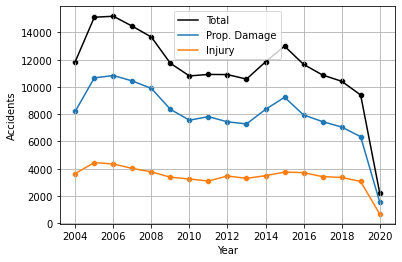

In [249]:
temp = pd.crosstab(short_df['YEAR'], short_df['SEVERITYCODE'])
data=short_df['YEAR'].value_counts(dropna=False).to_frame()
data.reset_index(inplace=True)
sns.lineplot(x="index", y="YEAR", data=data, color='k')
sns.scatterplot(x="index", y="YEAR", data=data, color='k')

data=short_df[short_df['SEVERITYCODE'] == 1]
data = data['YEAR'].value_counts().to_frame()
data.reset_index(inplace=True)
sns.lineplot(x="index", y="YEAR", data=data)
sns.scatterplot(x="index", y="YEAR", data=data, markers=True)

data=short_df[short_df['SEVERITYCODE'] == 2]
data = data['YEAR'].value_counts().to_frame()
data.reset_index(inplace=True)
sns.lineplot(x="index", y="YEAR", data=data)
sns.scatterplot(x="index", y="YEAR", data=data, markers=True)

plt.xlabel("Year")
plt.ylabel("Accidents")
plt.legend(['Total', 'Prop. Damage', 'Injury'])
plt.grid()

#### Q: Do more severe incidences occur on rainy days?

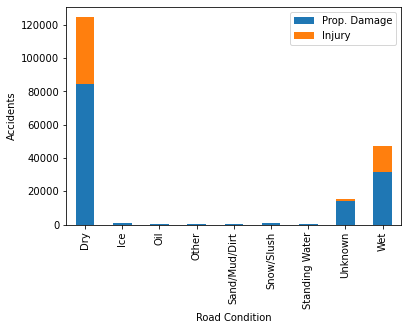

In [234]:
# short_df[['SEVERITYCODE','ROADCOND']]
pd.crosstab(short_df['ROADCOND'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
# pd.crosstab(short_df['SEVERITYCODE'], short_df['ROADCOND']).plot(kind='bar', stacked=True)

plt.xlabel("Road Condition")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

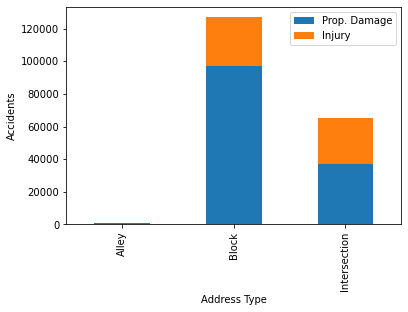

In [379]:
pd.crosstab(short_df['ADDRTYPE'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

y_pos = np.arange(2)
# plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')


plt.xlabel("Address Type")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Do more severe incidences occur on a particular day of week?

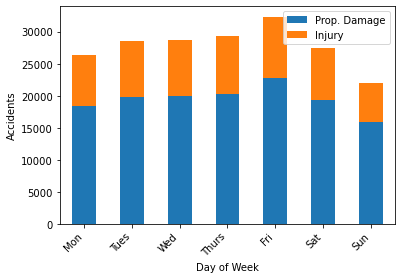

In [236]:
pd.crosstab(short_df['DAY_OF_WEEK'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

y_pos = np.arange(7)
plt.xticks(y_pos, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation=45, horizontalalignment='right')

plt.xlabel("Day of Week")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Do more severe incidences occur in a particular month?

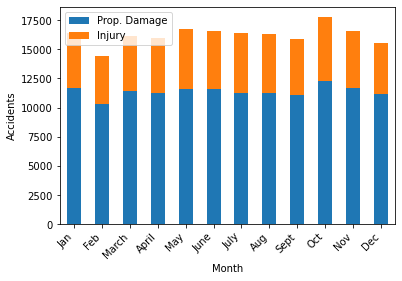

In [238]:
pd.crosstab(short_df['MONTH'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

y_pos = np.arange(12)
plt.xticks(y_pos, ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July','Aug','Sept','Oct','Nov','Dec'], rotation=45, horizontalalignment='right')

plt.xlabel("Month")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Severity vs. Parked Car

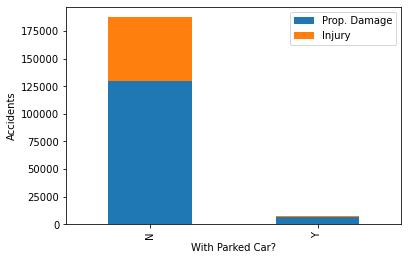

In [240]:
pd.crosstab(short_df['HITPARKEDCAR'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

plt.xlabel("With Parked Car?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Severity vs. Speed

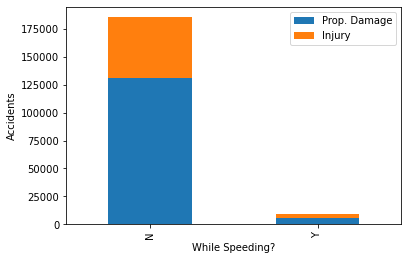

In [241]:
pd.crosstab(short_df['SPEEDING'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

plt.xlabel("While Speeding?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Severity vs. Under Influence

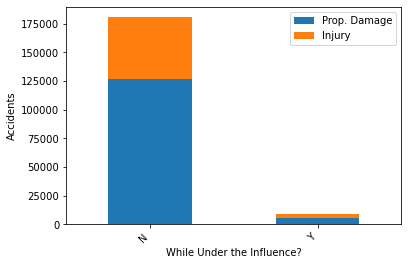

In [243]:
pd.crosstab(short_df['UNDERINFL'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

y_pos = np.arange(2)
plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')


plt.xlabel("While Under the Influence?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Severity vs. Inattentive

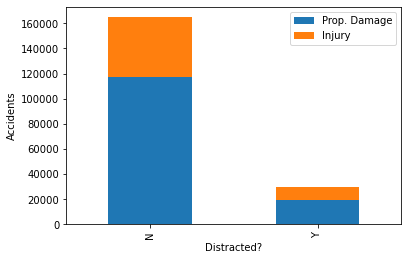

In [246]:
pd.crosstab(short_df['INATTENTIONIND'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

# y_pos = np.arange(2)
# plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')


plt.xlabel("Distracted?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Severity vs. Collision Type

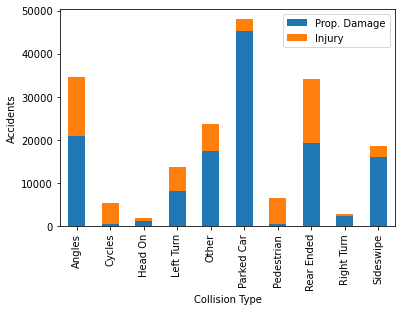

In [247]:
pd.crosstab(short_df['COLLISIONTYPE'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

# y_pos = np.arange(2)
# plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')


plt.xlabel("Collision Type")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

#### Q: Severity vs. Location

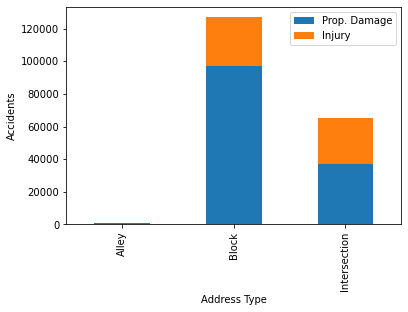

In [248]:
pd.crosstab(short_df['ADDRTYPE'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

# y_pos = np.arange(2)
# plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')


plt.xlabel("Address Type")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

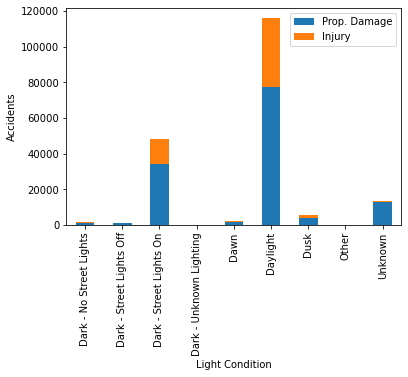

In [284]:
pd.crosstab(short_df['LIGHTCOND'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)

# y_pos = np.arange(2)
# plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')


plt.xlabel("Light Condition")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

## Modeling

#### Determine most important features resulting in 'injury' vs 'prop. damage'

#### First Try Decision Tree

In [359]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [370]:
X = short_df.drop('SEVERITYCODE', axis=1).values
X[pd.isnull(X)] = 'NaN'


## Convert catagorical variables to numbers
addr_conditions = preprocessing.LabelEncoder()
addr_conditions.fit(['Block','Intersection','NaN', 'Alley'])
X[:,0] = addr_conditions.transform(X[:,0]) 

coll_conditions = preprocessing.LabelEncoder()
coll_conditions.fit(['Parked Car','Angles','Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'NaN', 'Right Turn', 'Head On'])
X[:,1] = coll_conditions.transform(X[:,1]) 

road_conditions = preprocessing.LabelEncoder()
road_conditions.fit(['Dry','Wet','Unknown', 'NaN', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
X[:,2] = road_conditions.transform(X[:,2]) 

road_conditions = preprocessing.LabelEncoder()
road_conditions.fit(['Daylight','Dark - Street Lights On','Unknown', 'Dusk', 'NaN', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,3] = road_conditions.transform(X[:,3]) 

speeding = preprocessing.LabelEncoder()
speeding.fit(['Y','N'])
X[:,4] = speeding.transform(X[:,4]) 

attention = preprocessing.LabelEncoder()
attention.fit(['Y','N'])
X[:,5] = attention.transform(X[:,5]) 

influence = preprocessing.LabelEncoder()
influence.fit([0.0,1.0])
X[:,6] = influence.transform(X[:,6]) 

parked = preprocessing.LabelEncoder()
parked.fit(['Y','N'])
X[:,7] = parked.transform(X[:,7]) 

X= preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5] 

In [353]:
y = short_df['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [372]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

theTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
theTree # it shows the default parameters

theTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [373]:
predTree = theTree.predict(X_testset)
# print (predTree [10:100])
# print (y_testset [10:100])

In [383]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

print("Jaccard: " + str(jaccard_score(y_testset, predTree)))
print("F1: " + str(f1_score(y_testset, predTree)))

DecisionTrees's Accuracy:  0.7475942604705318
Jaccard: 0.7323953889443587
F1: 0.8455291368451938


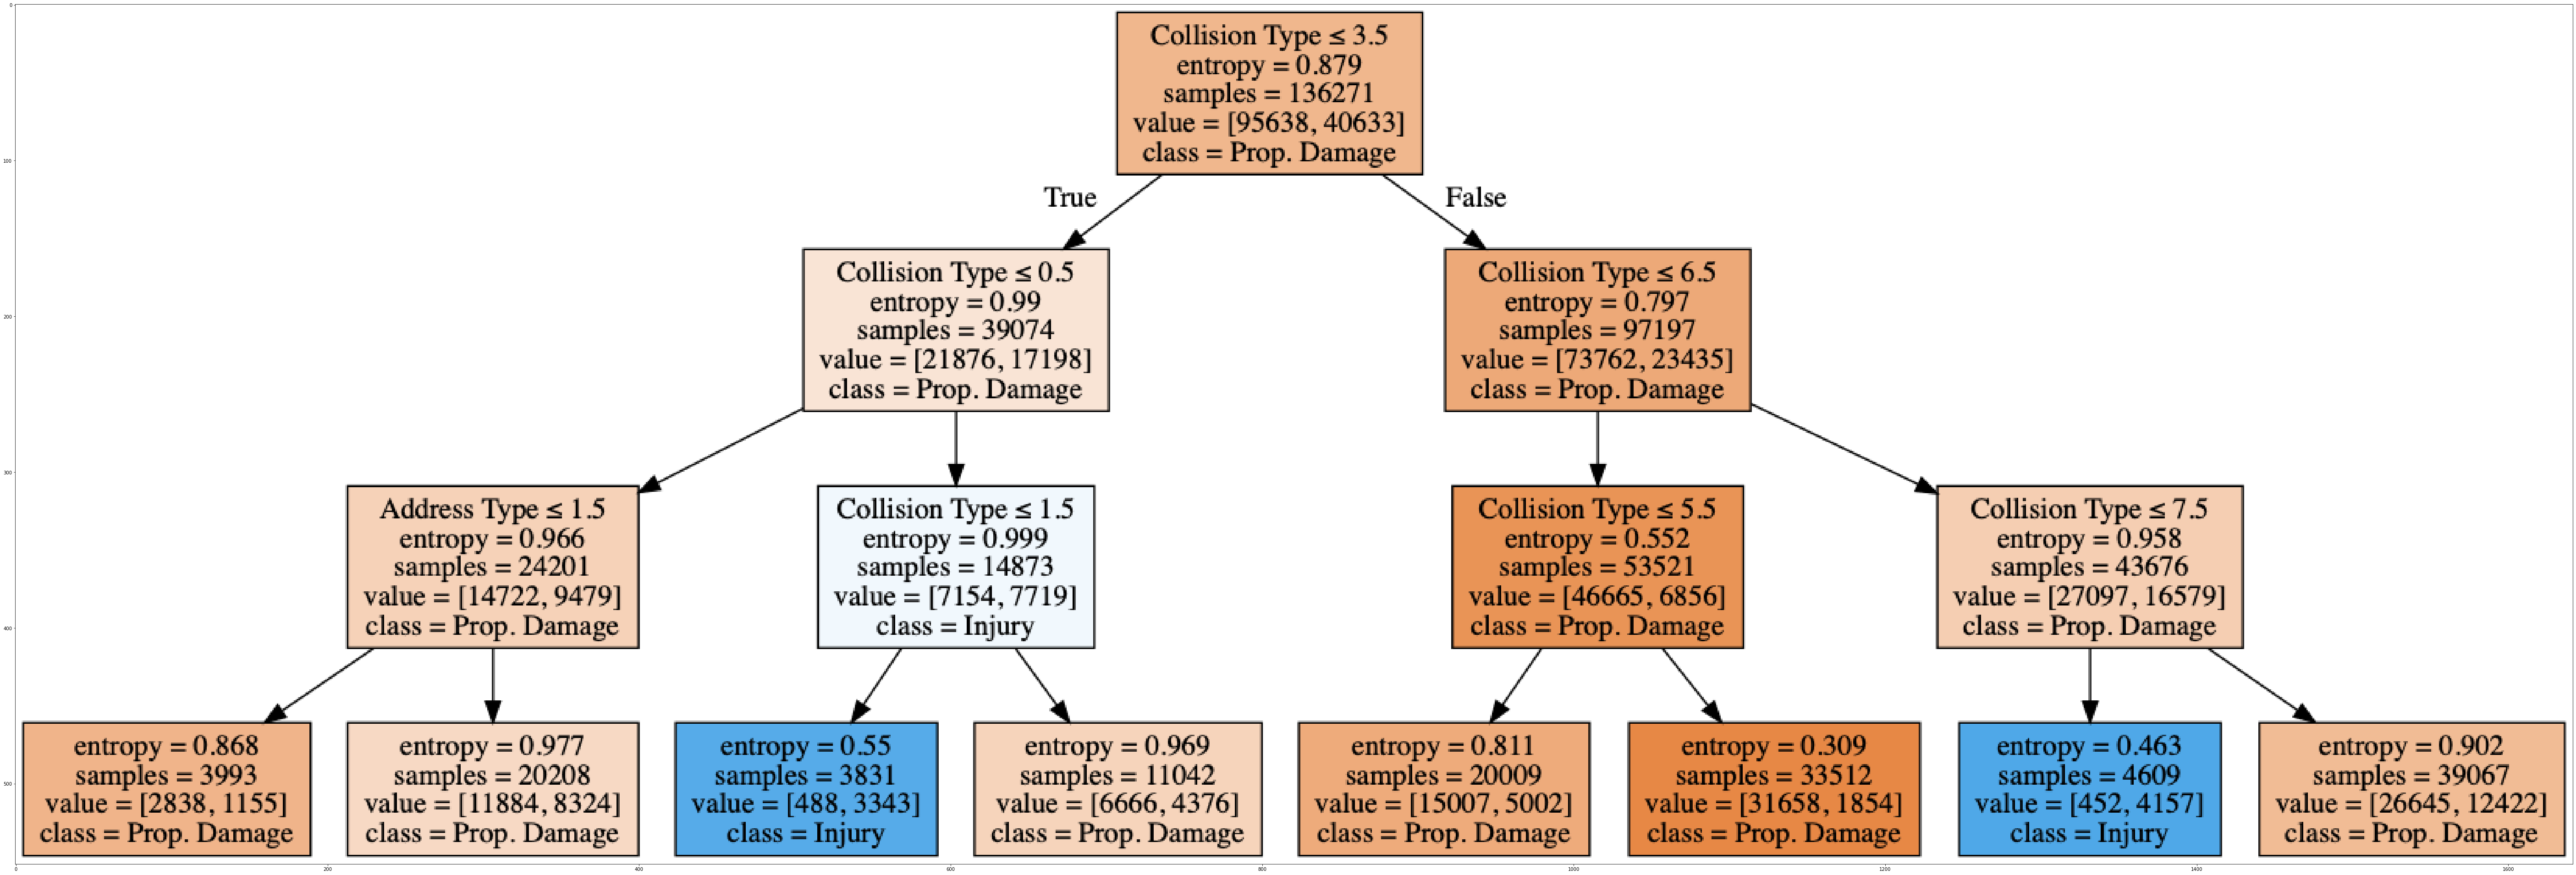

In [348]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "thetree.png"

featureNames = ['Address Type', 'Collision Type', 'Road Conditions', 'Light Conditions',
               'Speeding', 'Inattention', 'Under the Influence', 'Hit Parked', 'Year', 'Month', 'Day of Week']

targetNames = short_df["SEVERITYCODE"].unique().tolist()

# # targetNames = ['1','2']
class_names = ['Prop. Damage' , 'Injury']
# np.unique(y_trainset)
out=tree.export_graphviz(theTree,feature_names=featureNames, out_file=dot_data, class_names=class_names, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [343]:
short_df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'INATTENTIONIND', 'UNDERINFL', 'HITPARKEDCAR', 'YEAR',
       'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

#### OK, that was underwhelming. Try KNN

In [365]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 5
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset, y_trainset)
    yhat = neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)



KeyboardInterrupt: 

#### KNN has troubles with large datasets... Try Logistic Regression

In [387]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)

#Logistic Regression Calculations
yhat_lg = LR.predict(X_testset)
yhat_lg_prob = LR.predict_proba(X_testset)

print("Jaccard: " + str(jaccard_score(y_testset, yhat_lg)))
print("F1: " + str(f1_score(y_testset, yhat_lg)))
print("LogLoss: " + str(log_loss(y_testset, yhat_lg_prob)))

Jaccard: 0.6913812308549151
F1: 0.8175344721136036
LogLoss: 0.5815682713035217


In [388]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 
svm_yhat = clf.predict(X_testset)

print("Jaccard: " + str(jaccard_score(y_testset, svm_yhat)))
print("F1: " + str(f1_score(y_testset, svm_yhat)))

KeyboardInterrupt: 

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ERR       | ERR        | NA      |
| Decision Tree      | 0.7323      | 0.8455        | NA      |
| SVM                | ERR       | ERR        | NA      |
| LogisticRegression | 0.6913       | 0.8175        | 0.5815       |

#### OBSERVATIONS